## 🔑 OpenAI API Key

In [15]:
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_KEY = os.getenv("OPENAI_API_KEY")

## 📚 Imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI
from IPython.display import display

import traceback
import re # To clean the LLM Output

## 📥 Load datasets


In [17]:
yt_df = pd.read_csv("../data/youtube_data.csv")
rd_df = pd.read_csv("../data/reddit_data.csv")

In [18]:
yt_df.head()

,video_title,channel,comment,comment_sentiment,video_url
0,The Elder Scrolls IV: Oblivion Remastered - Fu...,Bethesda Softworks,"Came for the thumbnail, stayed for the vibes",0.0000,https://www.youtube.com/watch?v=Ed_E2crglcw
1,The Elder Scrolls IV: Oblivion Remastered - Fu...,Bethesda Softworks,That part at 2:45 Instant goosebumps,0.0000,https://www.youtube.com/watch?v=Ed_E2crglcw
2,The Elder Scrolls IV: Oblivion Remastered - Fu...,Bethesda Softworks,I guess Bethesda realized they should stop re ...,0.4019,https://www.youtube.com/watch?v=Ed_E2crglcw
3,The Elder Scrolls IV: Oblivion Remastered - Fu...,Bethesda Softworks,"Came for the thumbnail, stayed for the vibes",0.0000,https://www.youtube.com/watch?v=Ed_E2crglcw
4,The Elder Scrolls IV: Oblivion Remastered - Fu...,Bethesda Softworks,You just earned a new subscriber,0.0000,https://www.youtube.com/watch?v=Ed_E2crglcw


In [19]:
rd_df.head()

,youtube_title,reddit_post_title,post_score,post_url,post_created,post_sentiment,post_sentiment_emoji,comment,cleaned_comment,comment_sentiment,comment_sentiment_emoji,comment_author,comment_score
0,The Elder Scrolls IV: Oblivion Remastered - Fu...,Possessed Love Season 2 - Episode 9 - 250422,6,https://www.reddit.com/r/koreanvariety/comment...,2025-04-22 17:40:21,0.6369,😃,why did kangwon leave? weird 🤔🤔,why did kangwon leave weird,-0.2263,😐,009763,1
1,The Elder Scrolls IV: Oblivion Remastered - Fu...,Possessed Love Season 2 - Episode 9 - 250422,6,https://www.reddit.com/r/koreanvariety/comment...,2025-04-22 17:40:21,0.6369,😃,I saw the spoilers and just wondering why did ...,i saw the spoilers and just wondering why did ...,0.6280,😃,dreamstorming,1
2,The Elder Scrolls IV: Oblivion Remastered - Fu...,Possessed Love Season 2 - Episode 9 - 250422,6,https://www.reddit.com/r/koreanvariety/comment...,2025-04-22 17:40:21,0.6369,😃,Yugyeong really said- if you're not giving me ...,yugyeong really said if youre not giving me an...,-0.0351,😐,Rare-Counter-8772,1
3,The Elder Scrolls IV: Oblivion Remastered - Of...,The Elder Scrolls IV: Oblivion Remastered - Of...,3739,https://www.youtube.com/watch?v=wFJ3PZuAjK4,2025-04-22 15:15:16,0.0000,😐,"Wow, that looks absolutely great. A *huge* gra...",wow that looks absolutely great a huge graphic...,0.9716,😃,TheVoidDragon,1239
4,The Elder Scrolls IV: Oblivion Remastered - Of...,The Elder Scrolls IV: Oblivion Remastered - Of...,3739,https://www.youtube.com/watch?v=wFJ3PZuAjK4,2025-04-22 15:15:16,0.0000,😐,My goodness. I'd never expected this. They wen...,my goodness id never expected this they went a...,0.1779,😐,Walgreens_Security,620


## 🧹 Previews


In [6]:
print("🎥 YouTube data shape:", yt_df.shape)
print("📕 Reddit data shape:", rd_df.shape)

🎥 YouTube data shape: (749, 5)
📕 Reddit data shape: (196, 13)


### Example of how the most positive comment (in the dataset) looks like:

In [31]:
row = rd_df.loc[rd_df['comment_sentiment'].idxmin()]
print("Most Negative Comment:\n")
print(row['comment'])
print("\n🧠 Sentiment Score:", row['comment_sentiment'])

Most Negative Comment:

The "Biden was horrible, but this is equally as bad." got me. How the fuck is this equally as bad? Biden didn't singlehandedly tank the world economy and destroy our federal workforce and infrastructure. Their ability to ignore reality is... just... beyond the pale!

🧠 Sentiment Score: -0.9737


## 🎯 Aggregated Sentiment Analysis


## 📊 What is a KDE Plot?

**KDE** stands for **Kernel Density Estimate**.

A KDE (Kernel Density Estimate) plot is a type of visualization that provides a smooth, continuous curve representing the distribution of data, much like a histogram.

- It’s a way to **estimate the probability distribution** of a continuous variable — like sentiment scores.
- Unlike a histogram (which shows bars), a KDE plot shows a **smooth curve** that represents the **density of values**.

> Think of it as a smoothed-out version of a histogram that shows where data points are most concentrated.



---

## 📉 What The Following Plot Shows

The following KDE plot is comparing **sentiment scores** from:

- 🟦 **YouTube Comments**
- 🟧 **Reddit Comments**

Both are plotted on the same X-axis, which represents the **compound sentiment score** from VADER:
- **-1** = very negative
- **0** = neutral
- **+1** = very positive

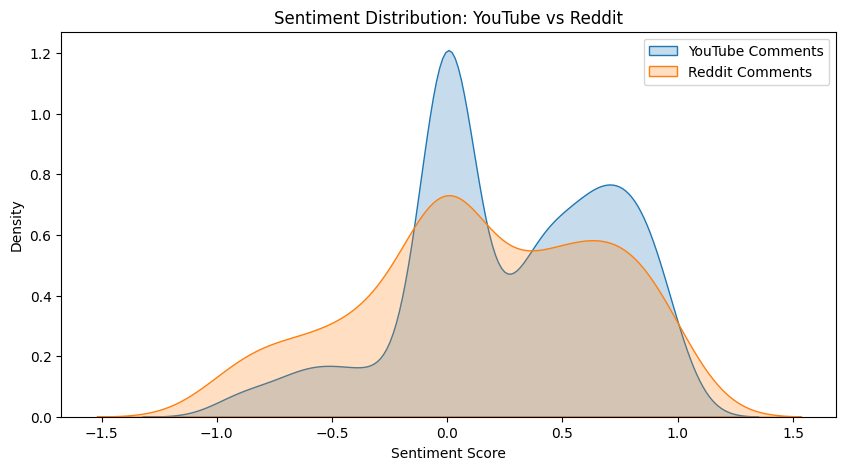

In [33]:
# Create plot
plt.figure(figsize=(10, 5))
sns.kdeplot(yt_df['comment_sentiment'], label='YouTube Comments', fill=True)
sns.kdeplot(rd_df['comment_sentiment'], label='Reddit Comments', fill=True)
plt.title('Sentiment Distribution: YouTube vs Reddit')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()

# ✅ Save BEFORE showing (Otherwise, a blank image will be saved)
plt.savefig("../data/sentiment_distribution.png", bbox_inches="tight")

# Then show (for notebook preview)
plt.show()
plt.close()

## 📖 Interpretation

### 1. **YouTube Comments (Blue)**:
- Peaks sharply **at 0** and again near **0.7**, indicating:
  - A high concentration of **neutral to moderately positive** comments
  - Very few extreme negative comments

### 2. **Reddit Comments (Orange)**:
- Smoother, more spread out
- Covers more of the **negative side** (to the left of 0)
  - Suggests Reddit users express **a wider range of sentiment**, including more negative tones

---

## 🧠 Key Takeaways

- **YouTube** has a **tighter, more positive skew**: Comments tend to be safe, neutral, or supportive.
- **Reddit** shows a **broader sentiment range**, including a noticeable **presence of criticism or sarcasm**.
- This supports the idea that Reddit discussions are more **opinionated**, while YouTube comments are often more surface-level or appreciative.

## 📊 Average Sentiment Comparison


In [34]:
avg_sentiments = pd.DataFrame({
    'Platform': ['YouTube', 'Reddit'],
    'Avg Comment Sentiment': [yt_df['comment_sentiment'].mean(), rd_df['comment_sentiment'].mean()]
})
display(avg_sentiments)

,Platform,Avg Comment Sentiment
0,YouTube,0.266027
1,Reddit,0.151047


## 🧠 Create grouped summaries for LLM


In [35]:
# Instantiating OpenAI
client = OpenAI(api_key=OPENAI_KEY)

In [36]:
topics = yt_df['video_title'].unique()
final_outputs = []

for topic in topics:
    yt_comments = yt_df[yt_df['video_title'] == topic]['comment'].dropna().tolist()
    reddit_rows = rd_df[rd_df['youtube_title'] == topic]
    reddit_post = reddit_rows['reddit_post_title'].unique()[0] if not reddit_rows.empty else "No Reddit post found"
    reddit_comments = reddit_rows['comment'].dropna().tolist()

    if not yt_comments and not reddit_comments:
        continue

    # ✅ Cleaned, limited comments for brevity
    yt_sample = "\n- ".join(yt_comments[:3])
    rd_sample = "\n- ".join(reddit_comments[:3])

    # ✅ Full prompt passed to model
    user_prompt = f"""
Video Title: {topic}
Reddit Post Title: {reddit_post}

🟦 YouTube Comments:
- {yt_sample}

🟥 Reddit Comments:
- {rd_sample}
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {
                    "role": "system",
                    "content": "You are a social media analyst. Analyze public perception around this topic using the comments from YouTube and Reddit. Provide a concise summary and highlight any sentiment trends or contrasting opinions between platforms."
                },
                {
                    "role": "user",
                    "content": user_prompt.strip()
                }
            ],
            temperature=0.7
        )
        output = response.choices[0].message.content
    except Exception as e:
        output = f"⚠️ Error for topic: {topic} | {str(e)}"
        print(traceback.format_exc())

    final_outputs.append({
        "topic": topic,
        "reddit_post_title": reddit_post,
        "llm_analysis": output
    })

## 📋 Show results

In [37]:
llm_df = pd.DataFrame(final_outputs)

# Using Regular Expressions to clean the LLM Output
def clean_llm_output(text):
    # Remove Markdown bold/italic
    text = re.sub(r"\*\*(.*?)\*\*", r"\1", text)
    text = re.sub(r"\*(.*?)\*", r"\1", text)
    # Remove Headers
    text = re.sub(r"\#+", r"", text)
    # Remove newlines and excessive spacing
    text = re.sub(r"\n+", "\n", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text.strip()

# Applying the cleaning function to the 'llm_analysis' column
llm_df['llm_clean_analysis'] = llm_df['llm_analysis'].apply(clean_llm_output)

llm_df.head()

,topic,reddit_post_title,llm_analysis,llm_clean_analysis
0,The Elder Scrolls IV: Oblivion Remastered - Fu...,Possessed Love Season 2 - Episode 9 - 250422,"Based on the comments from YouTube and Reddit,...","Based on the comments from YouTube and Reddit,..."
1,The Elder Scrolls IV: Oblivion Remastered - Of...,The Elder Scrolls IV: Oblivion Remastered - Of...,**Summary of Public Perception:**\n\nThe annou...,Summary of Public Perception:\nThe announcemen...
2,The Elder Scrolls IV: Oblivion Remastered - Of...,The Elder Scrolls IV: Oblivion Remastered | Re...,The public perception surrounding the announce...,The public perception surrounding the announce...
3,FULL SEGMENT: Randy Orton ROCKS John Cena with...,Post WWE Raw 4/21/2025 Show Discussion Thread ...,Based on the comments from both YouTube and Re...,Based on the comments from both YouTube and Re...
4,I KNOW WHAT YOU DID LAST SUMMER - Official Tra...,I KNOW WHAT YOU DID LAST SUMMER - Official Tra...,"The public perception of the trailer for ""I KN...","The public perception of the trailer for ""I KN..."


In [38]:
for llm_analysis in llm_df['llm_clean_analysis']:
    print(llm_analysis, end="\n\n\n")

Based on the comments from YouTube and Reddit, we can derive distinct public perceptions and sentiment trends for each platform regarding different topics.
YouTube Comments:
The YouTube comments focus on the reveal of "The Elder Scrolls IV: Oblivion Remastered." The sentiment is generally positive, with viewers expressing excitement and nostalgia. One commenter humorously notes the shift from continuously re-releasing "Skyrim" to now potentially seeing multiple re-releases of "Oblivion." This suggests a mix of enthusiasm for the remaster and skepticism about Bethesda's strategy of frequent re-releases.
Reddit Comments:
The Reddit comments are centered around the TV show "Possessed Love," specifically episode 9 of season 2. The sentiment here is more inquisitive and somewhat concerned, with users questioning the unexpected departure of a character named Kangwon. There is speculation about the reasons behind his exit, indicating a demand for transparency from the show's producers. Additi

## Saving to csv

In [39]:
llm_df.to_csv("../data/llm_insights.csv", index=False)